In [55]:
# !pip install influxdb-client

In [56]:
import influxdb_client
import pandas as pd
import matplotlib.pyplot as plt
import json
from pathlib import Path

In [57]:
config_file = "/windows/os/Thesis-Project/ODAbler/key-configurations/influxdb-config.json"
p = Path(config_file)
with p.open('r') as f:
    content = json.load(f)
    print(content)
url = content['url']
token = content['token']
org = content['org']
client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)
query_api = client.query_api()

{'bucket': 'FinalExperiment', 'org': '@Large-Research', 'token': 'd5KtoS1-I2iMVHiRQsVnXKV7MW7QR70Z1mqRdvqs08v-jKxEv8Q_URRHr2tl4AUwwqWHDeZNUKEtSTLjiCf-vg==', 'url': 'http://localhost:8086', 'location': 'Amsterdam'}


In [58]:
query_standard = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 1)'
result_standard = query_api.query_data_frame(org=org, query=query_standard)

#display(result_standard.head(10))
pd.set_option('display.max_columns', None)
df_standard = result_standard[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_standard)

     timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0         30.0       0.0        0.041667            1.0  200.010851  \
1         30.0       1.0        0.041667            1.0  200.010851   
2         30.0       2.0        0.041667            1.0  200.010851   
3         30.0       3.0        0.041667            1.0  200.010851   
4         30.0       4.0        0.000000            0.0  200.000000   
..         ...       ...             ...            ...         ...   
709      630.0      29.0        0.125000            3.0  200.292969   
710      630.0      30.0        0.208333            5.0  201.356337   
711      630.0      31.0        0.125000            3.0  200.292969   
712      630.0      32.0        0.208333            5.0  201.356337   
713      630.0      33.0        0.166667            4.0  200.694444   

      energyUsage  
0    6.000305e+03  
1    1.200054e+04  
2    1.800071e+04  
3    2.400081e+04  
4    3.000090e+04  
..            ...  
709  4.

In [59]:
query_heft = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 2)'
result_heft = query_api.query_data_frame(org=org, query=query_heft)
# |> range(start: 2023-09-25T22:00:00Z, stop: 2023-09-25T22:15:00Z)\
df_heft = result_heft[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_heft)

     timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0         30.0       0.0        0.041667            1.0  200.010851  \
1         30.0       1.0        0.041667            1.0  200.010851   
2         30.0       2.0        0.041667            1.0  200.010851   
3         30.0       3.0        0.041667            1.0  200.010851   
4         30.0       4.0        0.000000            0.0  200.000000   
..         ...       ...             ...            ...         ...   
709      630.0      29.0        0.125000            3.0  200.292969   
710      630.0      30.0        0.125000            3.0  200.292969   
711      630.0      31.0        0.125000            3.0  200.292969   
712      630.0      32.0        0.166667            4.0  200.694444   
713      630.0      33.0        0.125000            3.0  200.292969   

      energyUsage  
0    6.000305e+03  
1    1.200054e+04  
2    1.800071e+04  
3    2.400081e+04  
4    3.000090e+04  
..            ...  
709  4.

In [60]:
query_random = 'from(bucket:"FinalExperiment")\
|> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
|> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policyId|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|serverId/)\
|> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
|> filter(fn:(r) => r.policyId == 3)'
result_random = query_api.query_data_frame(org=org, query=query_random)

df_random = result_random[['timestamp','serverId','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
print(df_random)

     timestamp  serverId  cpuUtilisation  guestsRunning  powerUsage   
0         30.0       0.0        0.041667            1.0  200.010851  \
1         30.0       1.0        0.041667            1.0  200.010851   
2         30.0       2.0        0.041667            1.0  200.010851   
3         30.0       3.0        0.041667            1.0  200.010851   
4         30.0       4.0        0.041667            1.0  200.010851   
..         ...       ...             ...            ...         ...   
709      630.0      29.0        0.208333            5.0  201.356337   
710      630.0      30.0        0.166667            4.0  200.694444   
711      630.0      31.0        0.166667            4.0  200.694444   
712      630.0      32.0        0.125000            3.0  200.292969   
713      630.0      33.0        0.125000            3.0  200.292969   

      energyUsage  
0    6.000305e+03  
1    1.200054e+04  
2    1.800071e+04  
3    2.400082e+04  
4    3.000094e+04  
..            ...  
709  4.

In [61]:
# query_minmin = 'from(bucket:"Experiment")\
# |> range(start: 2023-10-24T18:00:00Z, stop: 2023-10-24T18:15:00Z)\
# |> filter(fn: (r) => r._measurement == "OpenDC_Energy_Experiment" and r._field =~ /policy_id|guestsRunning|cpuUtilisation|timestamp|powerUsage|energyUsage|host_id/)\
# |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")\
# |> filter(fn:(r) => r.policy_id == 4)'
# result_minmin = query_api.query_data_frame(org=org, query=query_minmin)
# 
# df_minmin = result_minmin[['timestamp','host_id','cpuUtilisation','guestsRunning','powerUsage','energyUsage']]
# print(df_minmin)

In [62]:
df_total_power_standard = df_standard[['timestamp','serverId','energyUsage']]
df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)
df_total_power_standard = df_total_power_standard.loc[df_total_power_standard['serverId'] == 33]
print(df_total_power_standard)

     timestamp  serverId   energyUsage
33        30.0        33  2.040013e+05
67        60.0        33  4.084244e+05
101       90.0        33  6.158390e+05
135      120.0        33  8.205856e+05
169      150.0        33  1.028208e+06
203      180.0        33  1.233004e+06
237      210.0        33  1.440666e+06
271      240.0        33  1.645376e+06
305      270.0        33  1.853101e+06
339      300.0        33  2.057880e+06
373      330.0        33  2.265545e+06
407      360.0        33  2.470230e+06
441      390.0        33  2.677721e+06
475      420.0        33  2.882482e+06
509      450.0        33  3.090145e+06
543      480.0        33  3.294796e+06
577      510.0        33  3.502290e+06
611      540.0        33  3.707038e+06
645      570.0        33  3.914758e+06
679      600.0        33  4.119444e+06
713      630.0        33  4.327172e+06


/tmp/ipykernel_84387/2723619327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_standard['serverId'] = df_total_power_standard['serverId']. astype(int)


In [63]:
df_total_power_heft = df_heft[['timestamp','serverId','energyUsage']]
df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)
df_total_power_heft = df_total_power_heft.loc[df_total_power_heft['serverId'] == 33]
print(df_total_power_heft)

     timestamp  serverId   energyUsage
33        30.0        33  2.040013e+05
67        60.0        33  4.084244e+05
101       90.0        33  6.158392e+05
135      120.0        33  8.205841e+05
169      150.0        33  1.028209e+06
203      180.0        33  1.233006e+06
237      210.0        33  1.440665e+06
271      240.0        33  1.645374e+06
305      270.0        33  1.853100e+06
339      300.0        33  2.057882e+06
373      330.0        33  2.265552e+06
407      360.0        33  2.470233e+06
441      390.0        33  2.677724e+06
475      420.0        33  2.882485e+06
509      450.0        33  3.090145e+06
543      480.0        33  3.294796e+06
577      510.0        33  3.502295e+06
611      540.0        33  3.707046e+06
645      570.0        33  3.914764e+06
679      600.0        33  4.119444e+06
713      630.0        33  4.327165e+06


/tmp/ipykernel_84387/2503661200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_heft['serverId'] = df_total_power_heft['serverId']. astype(int)


In [64]:
df_total_power_random = df_random[['timestamp','serverId','energyUsage']]
df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)
df_total_power_random = df_total_power_random.loc[df_total_power_random['serverId'] == 33]
print(df_total_power_random)

     timestamp  serverId   energyUsage
33        30.0        33  2.040013e+05
67        60.0        33  4.084253e+05
101       90.0        33  6.158439e+05
135      120.0        33  8.205887e+05
169      150.0        33  1.028199e+06
203      180.0        33  1.232995e+06
237      210.0        33  1.440649e+06
271      240.0        33  1.645356e+06
305      270.0        33  1.853079e+06
339      300.0        33  2.057858e+06
373      330.0        33  2.265528e+06
407      360.0        33  2.470209e+06
441      390.0        33  2.677697e+06
475      420.0        33  2.882459e+06
509      450.0        33  3.090119e+06
543      480.0        33  3.294768e+06
577      510.0        33  3.502266e+06
611      540.0        33  3.707014e+06
645      570.0        33  3.914731e+06
679      600.0        33  4.119413e+06
713      630.0        33  4.327126e+06


/tmp/ipykernel_84387/2942437879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_power_random['serverId'] = df_total_power_random['serverId']. astype(int)


In [65]:
# df_total_power_minmin = df_minmin[['timestamp','host_id','energyUsage']]
# df_total_power_minmin['host_id'] = df_total_power_minmin['host_id']. astype(int)
# df_total_power_minmin = df_total_power_minmin.loc[df_total_power_minmin['host_id'] == 33]
# print(df_total_power_minmin)

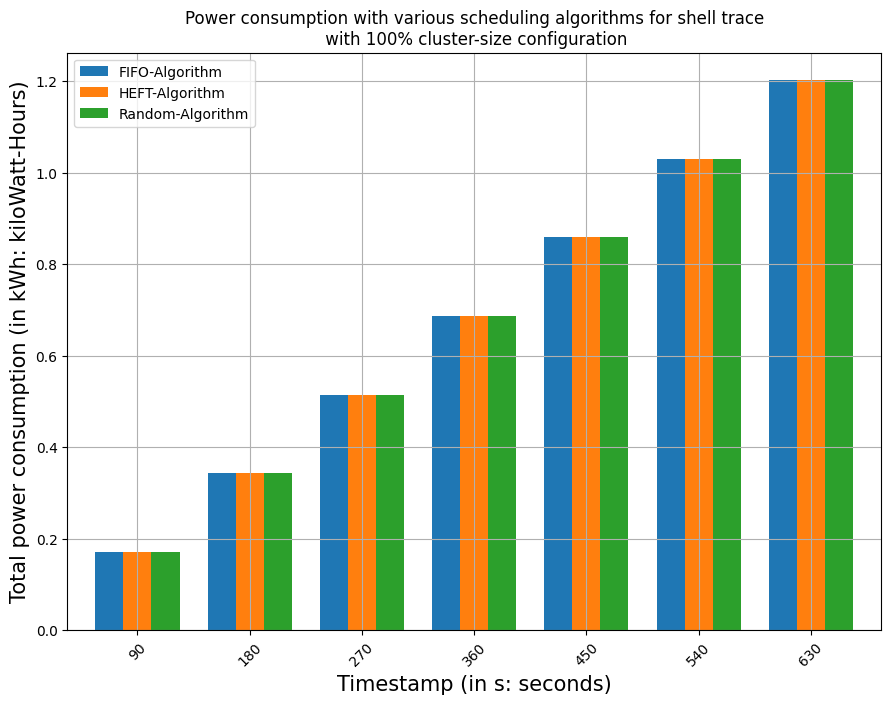

In [66]:
df1 = df_total_power_standard.drop(['serverId'], axis=1)
df2 = df_total_power_heft.drop(['serverId'], axis=1)
df3 = df_total_power_random.drop(['serverId'], axis=1)
# df4 = df_total_power_minmin.drop(['host_id'], axis=1)
# print(df1)
# Create a list of all the dataframes
dfs = [df1, df2, df3]

# Create a new dataframe with all the timestamps from all the dataframes
df_timestamps = pd.DataFrame({'timestamp': sorted(set(sum([df['timestamp'].tolist() for df in dfs], [])))})

# Merge the new dataframe with all the dataframes, filling in missing values with 0
df_merged = df_timestamps.merge(df1, how='left', on='timestamp', suffixes=('', '_x')).merge(df2, how='left', on='timestamp', suffixes=('', '_y')).merge(df3, how='left', on='timestamp', suffixes=('', '_z')).fillna(0)

# Convert watts to kiloWatt-hours
df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
# df_merged["energyUsage_w"] = df_merged["energyUsage_w"]/1000000
df_merged.rename(columns={'energyUsage': 'FIFO-Algorithm', 'energyUsage_y': 'HEFT-Algorithm', 'energyUsage_z': 'Random-Algorithm'}, inplace=True) #, 'energyUsage_w': 'MinMin-Algorithm'
df_merged['timestamp'] = df_merged['timestamp'].astype(int)

# drop first and second column to have consistent distance of plots
df_merged = df_merged.drop(0)
# df_merged = df_merged.reset_index(drop= True)
df_merged = df_merged.drop(1)
df_merged = df_merged.reset_index(drop= True)
# Create a custom x-axis with every 3rd value, due to very large number of elements in timestamp!
df_merged = df_merged[df_merged.index % 3 == 0]

# print(df_merged)
# Create a bar plot of the merged dataframe, grouped by timestamp
fig, ax = plt.subplots()
df_merged.plot.bar(x='timestamp', ax=ax, title='Power consumption with various scheduling algorithms for shell trace\n with 100% cluster-size configuration', width=.75)
plt.gca().xaxis.set_tick_params(rotation=45)
plt.grid(True)
plt.ylabel('Total power consumption (in kWh: kiloWatt-Hours)', fontsize=15)
plt.xlabel('Timestamp (in s: seconds)', fontsize=15)
fig.set_size_inches(10.5, 7.5)
fig.savefig('multiple_hosts_energy_plotted_trace_shell_100.png', bbox_inches='tight')
plt.show()

In [67]:
# df_merged["energyUsage"] = df_merged["energyUsage"]/(1000*3600)
# df_merged["energyUsage_y"] = df_merged["energyUsage_y"]/(1000*3600)
# df_merged["energyUsage_z"] = df_merged["energyUsage_z"]/(1000*3600)
print(df_merged)

    timestamp  FIFO-Algorithm  HEFT-Algorithm  Random-Algorithm
0          90        0.171066        0.171066          0.171068
3         180        0.342501        0.342502          0.342499
6         270        0.514750        0.514750          0.514744
9         360        0.686175        0.686176          0.686169
12        450        0.858373        0.858374          0.858366
15        540        1.029733        1.029735          1.029726
18        630        1.201992        1.201990          1.201980


In [68]:
# Reverse the column and find the first non-zero value for getting total power
last_non_zero_value_standard = df_merged[df_merged['FIFO-Algorithm'] != 0]['FIFO-Algorithm'].iloc[-1]
print(f"Total energy consumption in FIFO algorithm for executing given trace - {last_non_zero_value_standard} kWh")
last_non_zero_value_heft = df_merged[df_merged['HEFT-Algorithm'] != 0]['HEFT-Algorithm'].iloc[-1]
print(f"Total energy consumption in HEFT algorithm for executing given trace - {last_non_zero_value_heft} kWh")
last_non_zero_value_random = df_merged[df_merged['Random-Algorithm'] != 0]['Random-Algorithm'].iloc[-1]
print(f"Total energy consumption in Random algorithm for executing given trace - {last_non_zero_value_random} kWh")

Total energy consumption in FIFO algorithm for executing given trace - 1.2019921052834182 kWh
Total energy consumption in HEFT algorithm for executing given trace - 1.2019902621498855 kWh
Total energy consumption in Random algorithm for executing given trace - 1.201979547764901 kWh


In [69]:
total_energy_for_all_scheduling_algos = [last_non_zero_value_standard, last_non_zero_value_heft, last_non_zero_value_random]
print(total_energy_for_all_scheduling_algos)

[1.2019921052834182, 1.2019902621498855, 1.201979547764901]


In [70]:
min_value = min(total_energy_for_all_scheduling_algos)
dict = {0:"FIFO", 1:"HEFT", 2:"Random"}
min_index = total_energy_for_all_scheduling_algos.index(min_value)

# Calculate the percentage difference for each element compared to the minimum
percentages = []
for i, value in enumerate(total_energy_for_all_scheduling_algos):
    if i == min_index:
        continue  # Skip comparing the minimum value to itself
    percentage_difference = ((value - min_value) / min_value) * 100
    percentages.append((i, percentage_difference))

# Print the results
print(f"Resource scheduling algorithm {dict[min_index]} is the most optimal amongst the three scheduling algorithms analysed above!")
print("----------------------------------------------------------------------------------------------------------------------------------------------")
for i, percentage in percentages:
    print(f"Scheduling algorithm {dict[i]} records {abs(percentage):.5f}% {'better' if percentage < 0 else 'worse'} energy-efficiency than the scheduling algorithm {dict[min_index]} for shell workload trace and 100% cluster-size configuration.")


Resource scheduling algorithm Random is the most optimal amongst the three scheduling algorithms analysed above!
----------------------------------------------------------------------------------------------------------------------------------------------
Scheduling algorithm FIFO records 0.00104% worse energy-efficiency than the scheduling algorithm Random for shell workload trace and 100% cluster-size configuration.
Scheduling algorithm HEFT records 0.00089% worse energy-efficiency than the scheduling algorithm Random for shell workload trace and 100% cluster-size configuration.
